In [2]:
import sys
!{sys.executable} -m pip install deap

In [3]:
import pandas as pd
import numpy as np
import random
from deap import base, creator, tools, algorithms
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Load dataset
data = pd.read_csv('./cm1.csv')

# Drop any missing values
data = data.dropna()

# Separate features and target
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# GA code:

#Evaluation function for ranking
def evalMetricRanking(individual):
    # Use the order in the individual to select features
    X_train_ordered = X_train[:, individual]
    X_test_ordered = X_test[:, individual]
    
    # For demonstration, just using first three ordered features for evaluation
    X_train_selected = X_train_ordered[:, :3]
    X_test_selected = X_test_ordered[:, :3]
    
    clf = KNeighborsClassifier()
    clf.fit(X_train_selected, y_train)
    y_pred = clf.predict(X_test_selected)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy,

# Setting up the Genetic Algorithm

# Creating types
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

# Registering the functions
toolbox = base.Toolbox()
N_FEATURES = X_train.shape[1]
toolbox.register("indices", random.sample, range(N_FEATURES), N_FEATURES)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evalMetricRanking)

# Running the Genetic Algorithm
pop = toolbox.population(n=50)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("min", np.min)
stats.register("max", np.max)
algorithms.eaSimple(pop, toolbox, cxpb=0.7, mutpb=0.2, ngen=20, stats=stats, halloffame=hof, verbose=True)


gen	nevals	avg  	min 	max 
0  	50    	0.873	0.84	0.89
1  	38    	0.8778	0.86	0.89
2  	44    	0.8766	0.84	0.89
3  	40    	0.878 	0.86	0.89
4  	35    	0.879 	0.86	0.89
5  	42    	0.8784	0.86	0.89
6  	35    	0.8798	0.84	0.89
7  	38    	0.8834	0.84	0.89
8  	41    	0.8874	0.86	0.89
9  	33    	0.8892	0.87	0.89
10 	38    	0.8886	0.86	0.89
11 	37    	0.8896	0.88	0.89
12 	38    	0.8892	0.87	0.89
13 	28    	0.889 	0.87	0.89
14 	38    	0.8898	0.88	0.89
15 	36    	0.8894	0.87	0.89
16 	37    	0.8878	0.85	0.89
17 	46    	0.8886	0.84	0.89
18 	39    	0.888 	0.85	0.89
19 	37    	0.8882	0.86	0.89
20 	36    	0.8888	0.87	0.89


([[20, 15, 12, 9, 19, 17, 8, 10, 16, 3, 14, 1, 4, 13, 7, 11, 5, 6, 18, 2, 0],
  [20, 15, 12, 6, 2, 5, 10, 16, 0, 3, 4, 14, 8, 19, 7, 9, 1, 11, 18, 17, 13],
  [20, 15, 12, 4, 3, 19, 0, 16, 6, 11, 5, 9, 10, 8, 7, 1, 2, 14, 18, 13, 17],
  [20, 15, 12, 6, 2, 5, 10, 16, 0, 3, 4, 14, 8, 19, 7, 9, 1, 11, 18, 17, 13],
  [20, 15, 12, 0, 3, 19, 6, 7, 16, 2, 9, 4, 17, 5, 18, 1, 11, 14, 8, 13, 10],
  [20, 15, 12, 9, 3, 10, 7, 5, 16, 11, 0, 2, 8, 14, 18, 1, 4, 19, 6, 13, 17],
  [20, 15, 12, 9, 3, 4, 8, 0, 16, 5, 10, 14, 7, 19, 18, 1, 11, 2, 6, 13, 17],
  [20, 15, 12, 6, 5, 8, 10, 16, 0, 14, 9, 1, 3, 19, 7, 4, 11, 2, 18, 17, 13],
  [20, 15, 12, 10, 3, 14, 8, 16, 0, 5, 6, 1, 4, 19, 7, 9, 11, 2, 18, 17, 13],
  [20, 15, 12, 10, 3, 4, 8, 16, 0, 6, 2, 1, 14, 19, 7, 9, 11, 5, 18, 17, 13],
  [20, 15, 12, 7, 3, 8, 0, 10, 4, 14, 6, 9, 5, 19, 16, 1, 17, 13, 18, 2, 11],
  [20, 15, 12, 3, 5, 19, 8, 4, 7, 1, 16, 11, 6, 0, 10, 9, 14, 13, 18, 17, 2],
  [20, 15, 12, 17, 3, 5, 9, 7, 19, 10, 16, 11, 8, 4, 18, 1, 2, 1

Best ranked features:  [17, 1, 20]
Accuracy:  0.89
              precision    recall  f1-score   support

       False       0.89      1.00      0.94        88
        True       1.00      0.08      0.15        12

    accuracy                           0.89       100
   macro avg       0.94      0.54      0.55       100
weighted avg       0.90      0.89      0.85       100



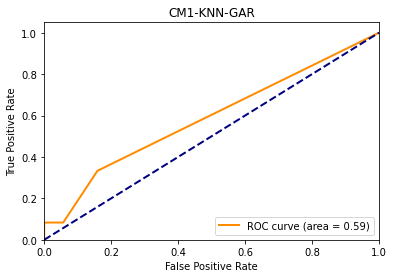

In [5]:
# Train and evaluate the KNN classifier using the best ranked features
best_ranking = hof[0]
# Let's say we use the top 3 ranked features (you can adjust this number)
selected_features = best_ranking[:3]
print("Best ranked features: ", selected_features)

X_train_selected = X_train[:, selected_features]
X_test_selected = X_test[:, selected_features]

clf = KNeighborsClassifier()
clf.fit(X_train_selected, y_train)

# Test the classifier
y_pred = clf.predict(X_test_selected)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Probabilities for the positive outcome
y_pred_proba = clf.predict_proba(X_test_selected)[:,1]
# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Save AUC values
df = pd.DataFrame({
    'AUC': roc_auc,
    'FPR': fpr,
    'TPR': tpr
})
df.to_csv('./AUC_Extracts/CM1/CM1_KNN_GAR.csv', index=False)

# Plot
plt.figure()
lw = 2  # line width
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('CM1-KNN-GAR')
plt.legend(loc="lower right")
plt.show()
